Erreur Quadratique Moyenne (Train) : 21.51
Erreur Quadratique Moyenne (Test) : 15.49
Coefficient de Détermination (Train) : 0.57
Coefficient de Détermination (Test) : 0.53


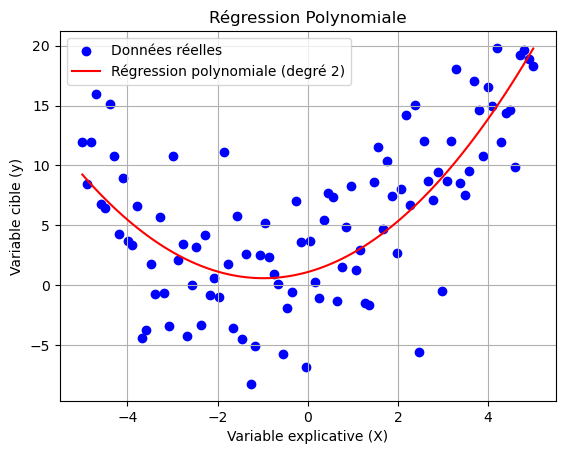

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Générer des données fictives non linéaires
np.random.seed(42)
X = np.linspace(-5, 5, 100).reshape(-1, 1)  # Variable explicative
y = 0.5 * X**2 + X + 2 + np.random.normal(0, 5, size=X.shape)  # Variable cible avec du bruit

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Transformer les données en caractéristiques polynomiales (degré 2)
degree = 2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)  # Transformation pour l'entraînement
X_test_poly = poly_features.transform(X_test)        # Transformation pour le test

# Entraîner un modèle de régression linéaire sur les données polynomiales
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Faire des prédictions
y_pred_train = model.predict(X_train_poly)
y_pred_test = model.predict(X_test_poly)

# Évaluer le modèle
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Erreur Quadratique Moyenne (Train) : {mse_train:.2f}")
print(f"Erreur Quadratique Moyenne (Test) : {mse_test:.2f}")
print(f"Coefficient de Détermination (Train) : {r2_train:.2f}")
print(f"Coefficient de Détermination (Test) : {r2_test:.2f}")

# Visualiser les résultats
X_plot = np.linspace(-5, 5, 100).reshape(-1, 1)
X_plot_poly = poly_features.transform(X_plot)
y_plot = model.predict(X_plot_poly)

plt.scatter(X, y, color='blue', label='Données réelles')  # Nuage de points
plt.plot(X_plot, y_plot, color='red', label=f'Régression polynomiale (degré {degree})')  # Courbe polynomiale
plt.title('Régression Polynomiale')
plt.xlabel('Variable explicative (X)')
plt.ylabel('Variable cible (y)')
plt.legend()
plt.grid(True)
plt.show()